In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Epsilon Graphs

In [2]:
def plot_epsilon(file_path, log=False, title=None):
    # Initialize an empty array to store the values from the selected column
    column_values = []

    # Open the file and read its content
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into columns using tab as the delimiter
            columns = line.strip().split()
            
            # Check if the selected column index is within the range of columns in the line
            if 0 <= 3 < len(columns):
                # Append the value from the selected column to the array
                column_values.append(columns[3])
    column_values = column_values[1:]
    column_values = [float(val) for val in column_values]
    values = np.array(column_values)
    if log:
        fig = plt.plot(np.log(values))
    else:
        fig = plt.plot(values)
    plt.xlabel('Iterations')
    if log:
        plt.ylabel('Log-Epsilon')
    else:
        plt.ylabel("Epsilon")
    if title:
        plt.title(title)
    plt.plot()


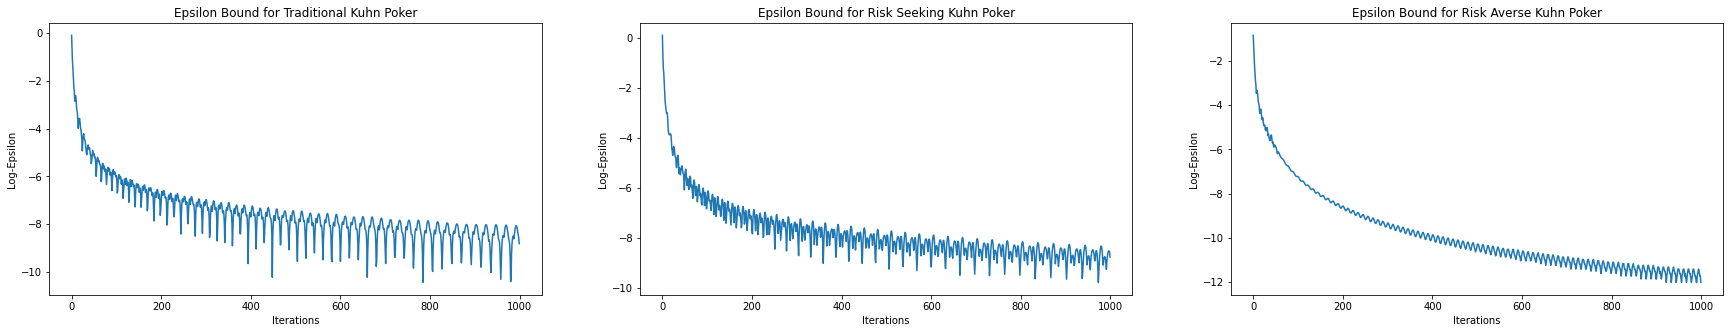

In [3]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 1)
plot_epsilon("runtime_files/kuhn_eps.txt", log=True, title="Epsilon Bound for Traditional Kuhn Poker")
plt.subplot(1, 3, 2)
plot_epsilon("runtime_files/kuhn_eps_3_3.txt",log=True, title="Epsilon Bound for Risk Seeking Kuhn Poker")
plt.subplot(1, 3, 3)
plot_epsilon("runtime_files/kuhn_eps_0.3_0.3.txt",log=True, title="Epsilon Bound for Risk Averse Kuhn Poker")

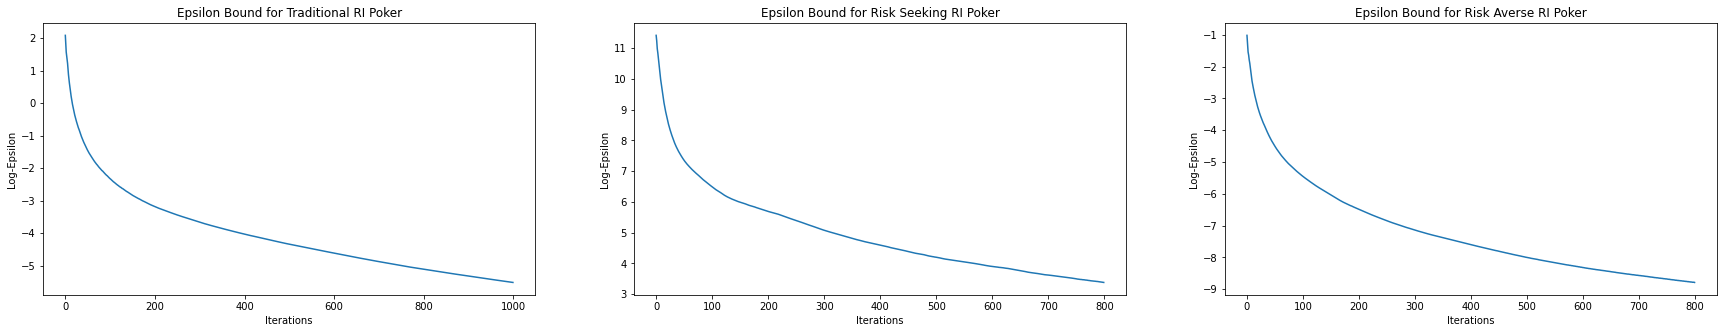

In [4]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 1)
plot_epsilon("runtime_files/ri_eps_1_1.txt", log=True, title="Epsilon Bound for Traditional RI Poker")
plt.subplot(1, 3, 2)
plot_epsilon("runtime_files/ri_eps_3_3.txt",log=True, title="Epsilon Bound for Risk Seeking RI Poker")
plt.subplot(1, 3, 3)
plot_epsilon("runtime_files/ri_eps_0.3_0.3.txt",log=True, title="Epsilon Bound for Risk Averse RI Poker")

## Strategy Utils

In [5]:
import pickle

with open('lookup_files/r6s4i1000.pkl', 'rb') as file:
    # Load the data from the file
    lookup = pickle.load(file)

In [6]:
strategy_1_1 = np.load('strategy_files/r6s4i1000_strategy.npz')
strategy_3_1 = np.load('strategy_files/r6s4_3_1_strategy.npz')
strategy_0_1 = np.load('strategy_files/r6s4_0.3_1_strategy.npz')
strategy_3_3 = np.load('strategy_files/r6s4_3_3_strategy.npz')
strategy_0_0 = np.load('strategy_files/r6s4_0.3_0.3_strategy.npz')

In [7]:
def get_strategy(player, strategy, key):
    data = np.zeros((6,4))
    for rank in range(6):
        for suit in range(4):
            hand = str((rank,suit))
            string = f"({hand}, {key}"
            entry = lookup[player][string]
            node = entry['n']
            probability = strategy[f"p{player + 1}"][node]
            data[rank][suit] = probability
    return data

def plot_array(data, title=None, hide=None):
    if hide:
        for hidden in hide:
            data[hidden[0], hidden[1]] = 0.5
    else:
        hide = []
    plt.imshow(data, cmap='bwr', interpolation='nearest')
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if (i,j) not in hide:
                plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='black')
    if title:
        plt.title(title)
    plt.colorbar()  # Add a colorbar for reference
    plt.clim(0, 1)

def plot_strategy(player, strategy, key, title=None, hide=None):
    data = get_strategy(player, strategy, key)
    plot_array(data, title, hide=hide)

def plot_all_strategies(player, key, title=None, hide=None):
    plt.figure(figsize=(10,8))
    plt.subplot(2, 3, 1)
    plot_strategy(player, strategy_1_1, key, r"$\alpha_1 = 1, \alpha_2 = 1$", hide=hide)
    plt.subplot(2, 3, 2)
    plot_strategy(player, strategy_3_1, key, r"$\alpha_1 = 3, \alpha_2 = 1$", hide=hide)
    plt.subplot(2, 3, 3)
    plot_strategy(player, strategy_3_3, key, r"$\alpha_1 = 3, \alpha_2 = 3$", hide=hide)
    plt.subplot(2, 3, 4)
    plot_strategy(player, strategy_0_1, key, r"$\alpha_1 = \frac{1}{3}, \alpha_2 = 1$", hide=hide)
    plt.subplot(2, 3, 5)
    plot_strategy(player, strategy_0_0, key, r"$\alpha_1 = \frac{1}{3}, \alpha_2 = \frac{1}{3}$", hide=hide)
    plt.suptitle(title)


some scenarios to consider:
- opening + defending ranges
- flop a flush and/or straight draw -- what are our ranges, what are our opponent's ranges?
- river is dry, what are our ranges (bluff probabilties, etc.)
- river is wet, what are our ranges (bluff probabilities, etc.)

## Opening Ranges

notes:
- we have a mixed strategy for P1: this is unintuitive, but maybe because:
    - lack of convergence -- especially because this converges last because this depends on future actions
    - it is also not super obvious is 3, 4, 5, etc. better -- 1, 2, 3, 4 allow for more combos of straights, and 5 is higher
- P2: call/reraising some hands mixed, similarly none of them are way better for us

P1 risk seeking version:
- p1 always raises -- makes sense, risk seeking -- more money in pot, higher variance!
    - why is this different from the Kuhn scenario? this ISNT A BLUFF -- we have chances to win with everything, so it is always good to put money in the pot
- p2 always RERAISES? why??
-   hypothesis: this is because it makes P1 even MORE risk seeking which makes them play "worse" post flop? 
    - OR: P2 wins majority of time because of P1's risk seeking play style, so we know P1 will call so we might as well bloat the pot -- + EV

both risk:
- P1 starts raising LESS (similar to Kuhn) -- counteracting effects

P1 risk averse version:
- raise less now: makes sense? lack of convergence means that lower probabilities are probably linked to low EV things

both risk averse:
- raise amount increases -- similarly counteracting

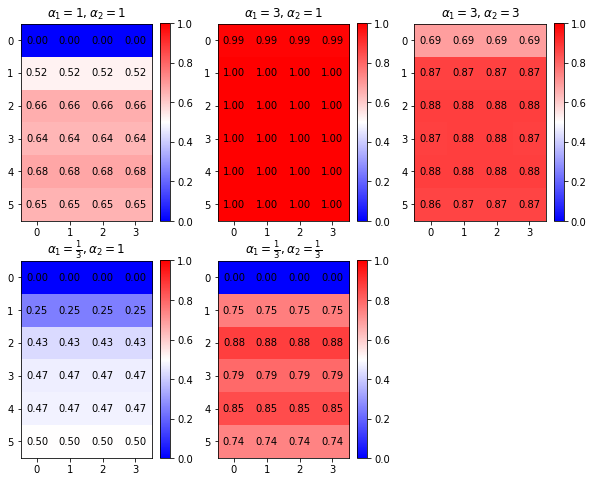

In [8]:
# opening
plot_all_strategies(0, "[-1, -1], (('p0', 0, 'r1'),))")

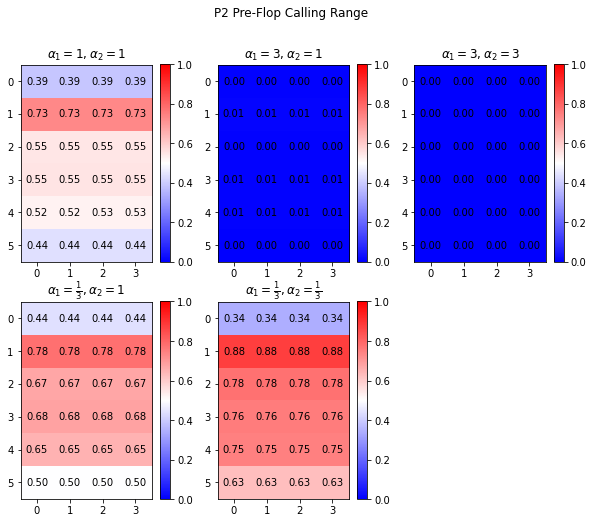

In [9]:
plot_all_strategies(1, "[-1, -1], (('p0', 0, 'r1'), ('p1', 0, 'c')))", "P2 Pre-Flop Calling Range")

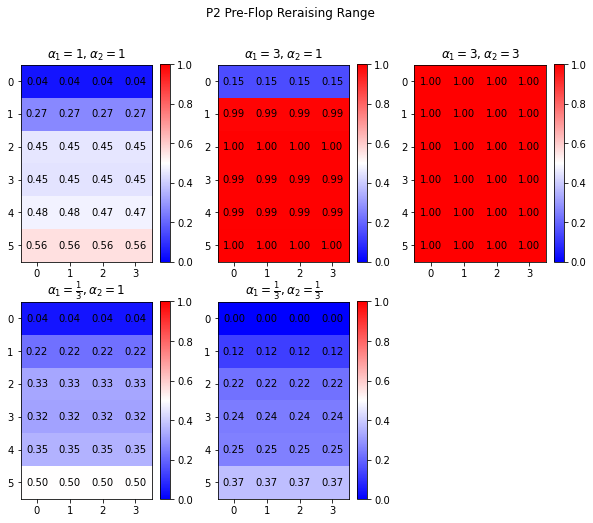

In [10]:
plot_all_strategies(1, "[-1, -1], (('p0', 0, 'r1'), ('p1', 0, 'r1')))", "P2 Pre-Flop Reraising Range")

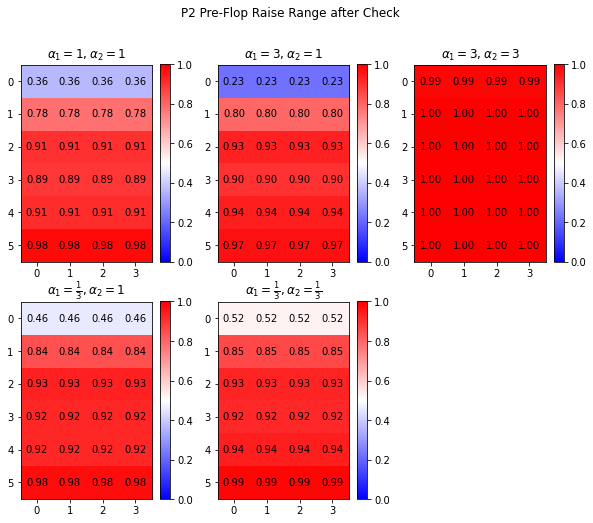

In [11]:
plot_all_strategies(1, "[-1, -1], (('p0', 0, 'c'), ('p1', 0, 'r1')))", "P2 Pre-Flop Raise Range after Check")

## Flop

explanation:
- P1 is betting their good hands mostly and bluffing a little bit with bad ones -- makes sense
- WHY IS P2 DEFENDING SO MUCH?? we'll see later i guess?

P1 risk:
- similar but they are just betting more hands too -- similar logic as the flop

both risk:
- now they bet more? this is confusing as well, seems inverse -- why are we betting with everything?

P1 averse: 
- basically identical equilibrium as before?

both averse:
- now we bet more -- this makes sense i guess?

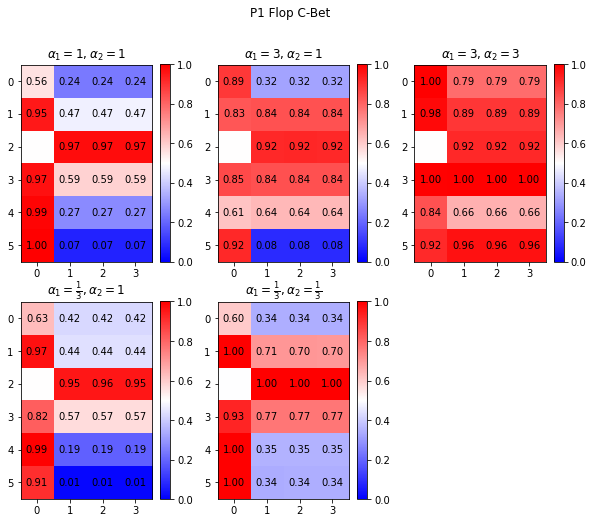

In [12]:
plot_all_strategies(0, "[(2, 0), -1], (('p0', 0, 'r1'), ('p1', 0, 'c'), ('p0', 1, 'r1')))", "P1 Flop C-Bet", hide=[(2,0)])

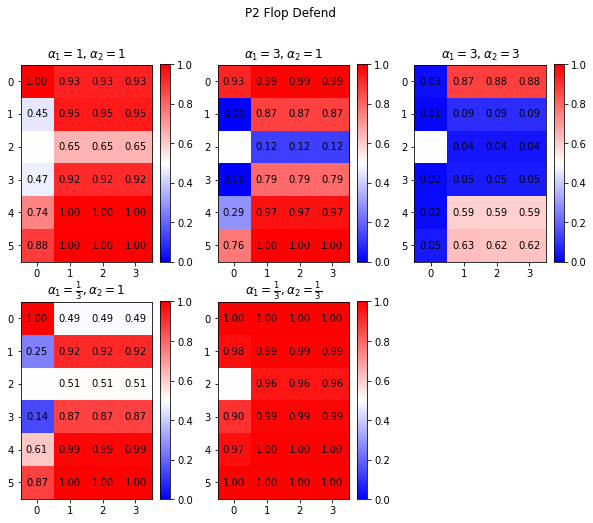

In [13]:
plot_all_strategies(1, "[(2, 0), -1], (('p0', 0, 'r1'), ('p1', 0, 'c'), ('p0', 1, 'r1'), ('p1', 1, 'c')))", "P2 Flop Defend", hide=[(2,0)])

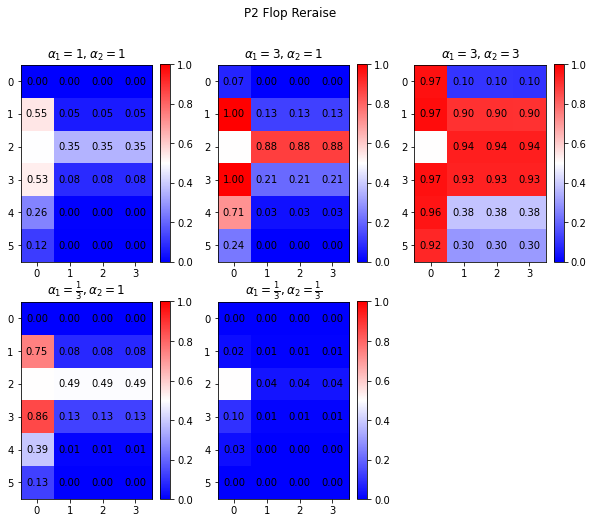

In [14]:
plot_all_strategies(1, "[(2, 0), -1], (('p0', 0, 'r1'), ('p1', 0, 'c'), ('p0', 1, 'r1'), ('p1', 1, 'r1')))", "P2 Flop Reraise", hide=[(2,0)])

## wet river

notes:
in the non risk strategy, p1 bluffs with 5 and 1, non suited, and bets their straights, but does not bet their straight flushes
- this is a bit surprising -- but makes sense, given that p2 has not raised, they probably do not have a good hand, so we wait for them to bluff (or bet their value) and raise our SF instead
then, in response to P1 raise:
- P2 defends a LOT of hands, but presumably they have a lot of junk and not that many good hands at this point, so that's why P1 is able to bluff so much
    - presumably P2's range is just really weak

how does risk affect this:
p0 raise:
- way more bluffing? but we also bet our good hands more?


p1 raise:

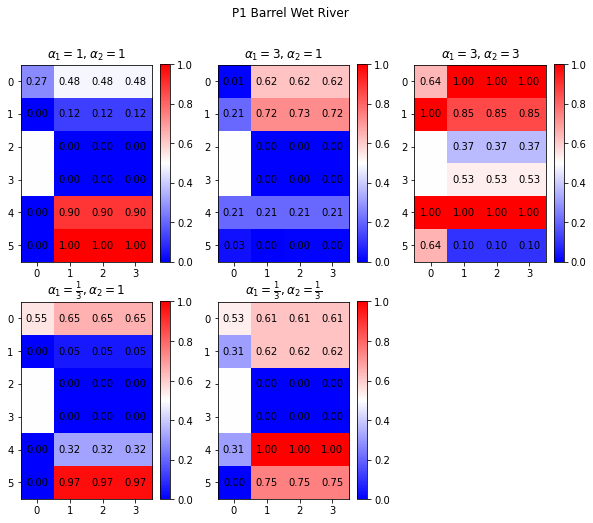

In [15]:
plot_all_strategies(0, "[(2, 0), (3, 0)], (('p0', 0, 'r1'), ('p1', 0, 'c'), ('p0', 1, 'r1'), ('p1', 1, 'c'), ('p0', 2, 'r1')))", "P1 Barrel Wet River", hide=[(2,0), (3,0)])

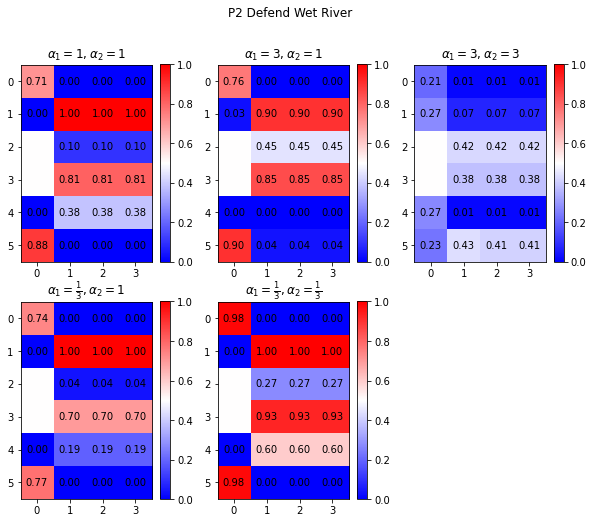

In [16]:
plot_all_strategies(1, "[(2, 0), (3, 0)], (('p0', 0, 'r1'), ('p1', 0, 'c'), ('p0', 1, 'r1'), ('p1', 1, 'c'), ('p0', 2, 'r1'), ('p1', 2, 'c')))", "P2 Defend Wet River", hide=[(2,0), (3,0)])

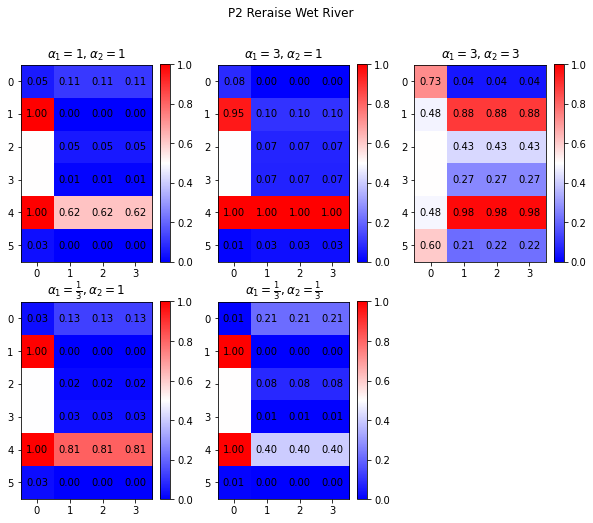

In [17]:
plot_all_strategies(1, "[(2, 0), (3, 0)], (('p0', 0, 'r1'), ('p1', 0, 'c'), ('p0', 1, 'r1'), ('p1', 1, 'c'), ('p0', 2, 'r1'), ('p1', 2, 'r1')))", "P2 Reraise Wet River", hide=[(2,0), (3,0)])